# Getting the Data

In [0]:
# Importing the libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [0]:
sns.set()
%matplotlib inline

In [0]:
df = pd.read_csv("./SalaryData.csv") # getting the data

In [4]:
df.head() # checking the first 5 rows

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.shape # shape

(30, 2)

In [7]:
# checking for misssing (NaN) values
df.isnull().values.any()

False

In [9]:
# splitting the dataset set into training and test sets
train_set, test_set = train_test_split(df, test_size=0.2, random_state=40)
train_set.shape, test_set.shape

((24, 2), (6, 2))

In [0]:
df_copy = train_set.copy() # save a copy of the data


# Exploratory Data Analysis

In [12]:
df_copy.describe() # get the descriptive statistic of data

,YearsExperience,Salary
count,24.000000,24.000000
mean,5.554167,79010.833333
std,3.055996,28777.276495
min,1.100000,39343.000000
25%,3.150000,56430.000000
50%,4.650000,72904.000000
75%,8.325000,106544.250000
max,10.500000,122391.000000


In [13]:
df_copy.corr() # finding the correlation

,YearsExperience,Salary
YearsExperience,1.000000,0.984283
Salary,0.984283,1.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


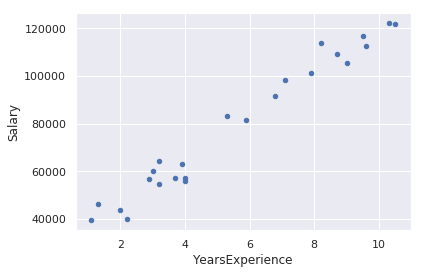

In [14]:
df_copy.plot.scatter(x='YearsExperience', y='Salary')# plotting the values

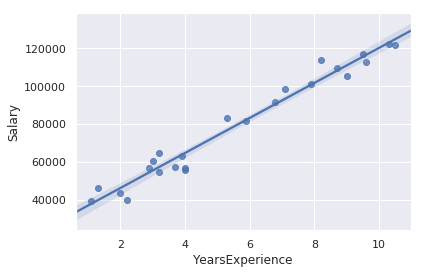

In [15]:
sns.regplot(x="YearsExperience", y="Salary", data=df_copy)

# Building the Model

In [0]:
test_set_full = test_set.copy()
test_set = test_set.drop(["Salary"], axis=1) # drop salary(labels for the test_set)

In [0]:
train_labels = df_copy["Salary"]

In [0]:
train_set_full = train_set.copy()
# train_set = train_set.drop(["Salary"], axis=1) # drop salary(labels for the test_set)

In [0]:
lin_reg = LinearRegression() # Initializing our model

In [22]:
lin_reg.fit(train_set, train_labels) # fitting model to data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
# amaking a prediction on the test set
salary_pred = lin_reg.predict(test_set)
salary_pred

array([41434.13316677, 74801.31604849, 83143.11176892, 69240.11890153,
       72947.58366617, 65532.6541369 ])

# Scoring our Model

In [40]:
print(salary_pred)
print(test_set_full["Salary"])

[41434.13316677 74801.31604849 83143.11176892 69240.11890153
 72947.58366617 65532.6541369 ]
2     37731.0
16    66029.0
19    93940.0
14    61111.0
15    67938.0
13    57081.0
Name: Salary, dtype: float64


In [41]:
lin_reg.score(test_set, test_set_full["Salary"])


0.7775083459037234

In [42]:
r2_score(test_set_full["Salary"], salary_pred) #usin the r2_score

0.7775083459037234

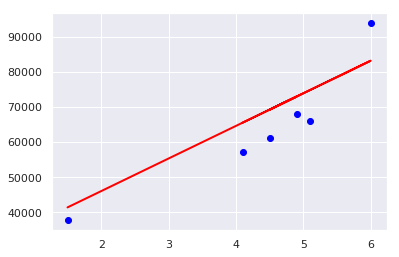

In [43]:
plt.scatter(test_set_full["YearsExperience"], test_set_full["Salary"],  color='blue')
plt.plot(test_set_full["YearsExperience"], salary_pred, color='red', linewidth=2)

# Persisting the Model

In [0]:
import pickle # Using Python Pickle to persist model

with open("python_lin_reg_model.pkl", "wb") as file_handler:
    pickle.dump(lin_reg, file_handler)   

In [28]:
with open("python_lin_reg_model.pkl", "rb") as file_handler:
    loaded_pickle = pickle.load(file_handler)
    
loaded_pickle

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
import joblib
# Using Scikit-Learn's Joblib
BASE_URL = "http://localhost:5000"

joblib.dump(lin_reg, "linear_regression_model.pkl")

joblib.dump(train_set, "training_data.pkl")
joblib.dump(train_labels, "training_labels.pkl")

['training_labels.pkl']

In [0]:
# # Predict API
# import requests

# years_exp = {"yearsOfExperience": 8}

# response = requests.post("{}/predict".format(BASE_URL), json = years_exp)

# response.json()

In [44]:
df_copy.query('YearsExperience > 7 and YearsExperience <= 8')

,YearsExperience,Salary
21,7.1,98273.0
22,7.9,101302.0


In [0]:
# # Retrain the API
# import json

# data = json.dumps([{"YearsExperience": 12,"Salary": 140000}, 
#                    {"YearsExperience": 12.1,"Salary": 142000}])

# data

In [0]:
# response = requests.post("{}/retrain".format(BASE_URL), json = data)

# response.json()

In [0]:
# response = requests.get("{}/currentDetails".format(BASE_URL))

# response.json()